look at output from script compute_full_transfer.py which is based on notebook implement_transfer_parallel.ipynb

In [2]:
import netCDF4 as nc
import numpy.ma as ma
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

plt.rcParams["image.cmap"] = 'seismic'

In [3]:
entropy_transfer_output = np.load("/users/tms535/scratch/calc-zonal-transfer/calc_entropy_transfer/transfer-c33_entropy.npz")
entropy_transfer_output.files #in result: (theta, [T_v,T_n,T_d], kys,kxs,kxt)

['entropy_result', 'kx', 'ky', 'output_shape']

In [4]:
entropy_result = entropy_transfer_output["entropy_result"]

entropy_result.shape, entropy_transfer_output["output_shape"]

((13, 6, 10, 2, 43, 43, 43),
 array(['theta', 'energy', 'lambda', 'sign', 'kys', 'kxs', 'kxt'],
       dtype='<U6'))

## check that entropy transfer is the same as in initial implementation "implement_transfer.ipynb"

In [5]:
kx = entropy_transfer_output["kx"]
ky = entropy_transfer_output["ky"]

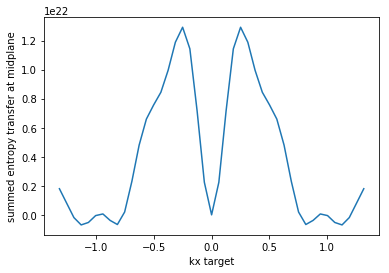

strongest kx-target mode index is:  25


In [6]:
#find strongest kx target at midplane
ii_theta = 6

plt.plot(kx,np.sum(entropy_result[ii_theta,:],axis=(0,1,2,3,4)))
plt.xlabel("kx target")
plt.ylabel("summed entropy transfer at midplane")
plt.show()
print("strongest kx-target mode index is: ",np.argmax(np.sum(entropy_result[6,:],axis=(0,1,2,3,4))))

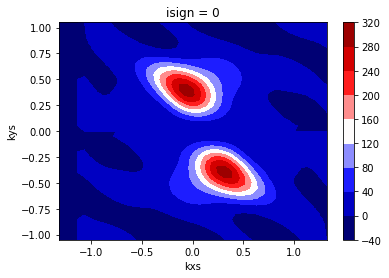

In [7]:
ii_energy = 3

#NOTE: notice mirror effect of parallel propagation sign mode
ii_sign = 0 

'''
NOTE: the larger ii_lambda, i.e. the larger pitch angle, the smaller gets the theta range in which any transfer happens. 
i.e. ii_lambda = 5 is limited to theta[2:10] and ii_lambda = 9 is limited to theta[6] = midplane.
For ii_lambda = 9 only midplane, ii_theta = 6, has any data. Makes sense bc of trapping.
'''
ii_lambda = 5 


ii_kxt = 25 #NOte ii_kxt=21 <=> kxt=0 and since kyt = 0 already this is background, i.e. not perturbation and hence zero

plt.contourf(kx,ky,entropy_result[ii_theta,ii_energy,ii_lambda,ii_sign,:,:,ii_kxt]) 
plt.ylabel("kys")
plt.xlabel("kxs")
plt.colorbar()
plt.title("isign = "+str(ii_sign))
plt.show()

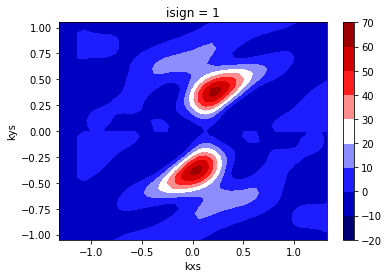

In [8]:
ii_sign = 1

plt.contourf(kx,ky,entropy_result[ii_theta,ii_energy,ii_lambda,ii_sign,:,:,ii_kxt])
plt.ylabel("kys")
plt.xlabel("kxs")
plt.colorbar()
plt.title("isign = "+str(ii_sign))
plt.show()

-> same as in initial implementation in "implement_transfer.ipynb"

## compare entropy transfer to transfer of moments: internal and kinetic energy transfer

In [9]:
moment_transfer_output = np.load("/users/tms535/scratch/calc-zonal-transfer/calc_entropy_transfer/transfer-c33.npz")
moment_transfer_output.files 

['result', 'kx', 'ky', 'it_start', 'it_end', 'output_shape']

In [10]:
moment_result = moment_transfer_output["result"]

moment_result.shape, moment_transfer_output["output_shape"]

((13, 3, 43, 43, 43),
 array(['theta', '[T_v,T_n,T_d]', 'kys', 'kxs', 'kxt'], dtype='<U13'))

In [11]:
kinetic_result = moment_result[:,0,:,:,:]
internal_full_result = moment_result[:,1,:,:,:]
internal_nonadiab_result = moment_result[:,2,:,:,:] 

np.sum(kinetic_result), np.sum(internal_full_result), np.sum(internal_nonadiab_result)

(-0.04698145905066406, -4.80454671587801e-06, 2.305841048302695e-05)

In [12]:
print(np.all(kx == moment_transfer_output["kx"]) and np.all(ky == moment_transfer_output["ky"]))

True


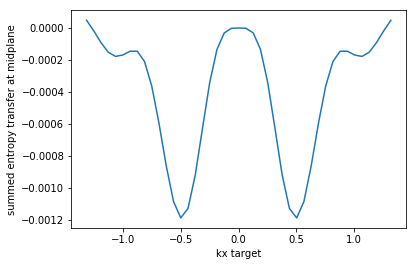

strongest kx-target mode index is:  0


In [13]:
#find strongest kx target at midplane
plt.plot(kx,np.sum(kinetic_result[ii_theta,:],axis=(0,1)))
plt.xlabel("kx target")
plt.ylabel("summed entropy transfer at midplane")
plt.show()
print("strongest kx-target mode index is: ",np.argmax(np.sum(kinetic_result[ii_theta,:],axis=(0,1))))

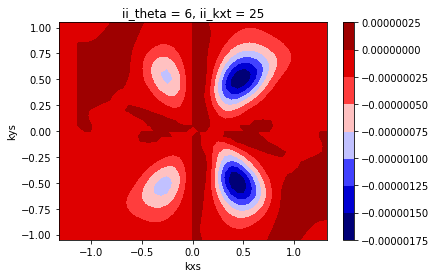

In [14]:
plt.contourf(kx,ky,kinetic_result[ii_theta,:,:,ii_kxt])
plt.ylabel("kys")
plt.xlabel("kxs")
plt.colorbar()
plt.title("ii_theta = {}, ii_kxt = {}".format(ii_theta,ii_kxt))
plt.show()

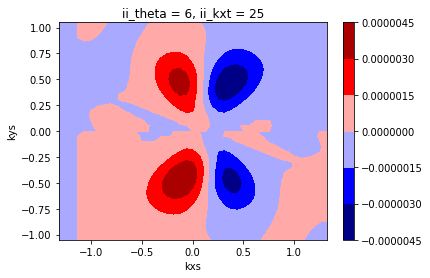

In [15]:
plt.contourf(kx,ky,internal_full_result[ii_theta,:,:,ii_kxt])
plt.ylabel("kys")
plt.xlabel("kxs")
plt.colorbar()
plt.title("ii_theta = {}, ii_kxt = {}".format(ii_theta,ii_kxt))
plt.show()

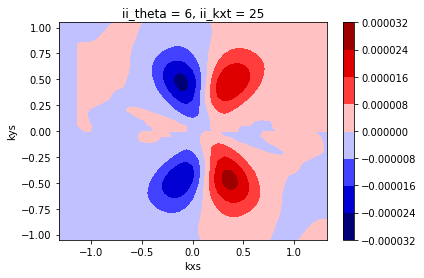

In [16]:

plt.contourf(kx,ky,internal_nonadiab_result[ii_theta,:,:,ii_kxt])
plt.ylabel("kys")
plt.xlabel("kxs")
plt.colorbar()
plt.title("ii_theta = {}, ii_kxt = {}".format(ii_theta,ii_kxt))
plt.show()